C:\Users\Sameeha\AppData\Local\Temp\ipykernel_23052\4171206669.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=growth_df, x='Net Rank Change', y='Domain', palette=colors)


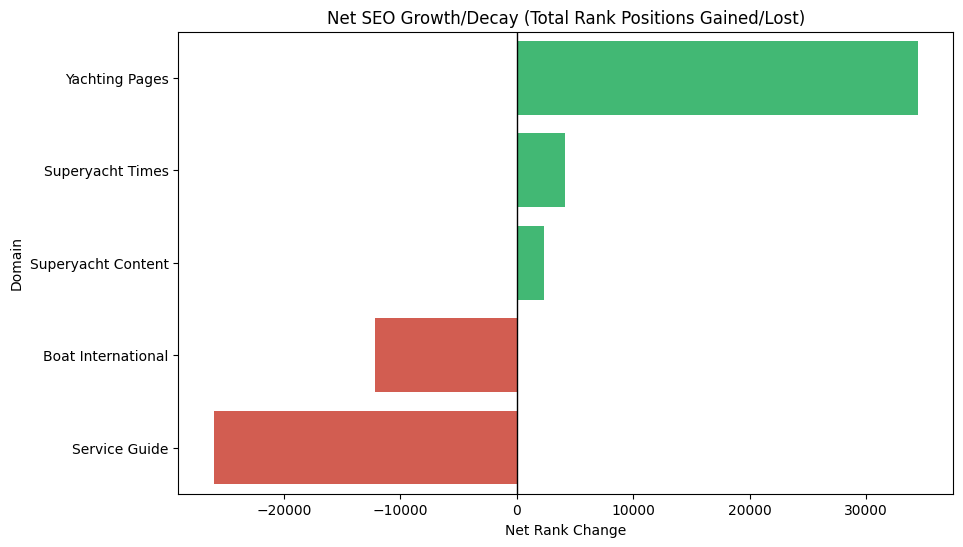

--- SERP Volatility by Intent (Yachting Pages) ---
                Volatility (SD)  Avg Change  Keyword Count
primary intent                                            
n                     21.236557    9.907407            162
c                     16.443522    7.839735            755
i                     14.461857    6.623602           4025
t                     13.876377    5.923077             26


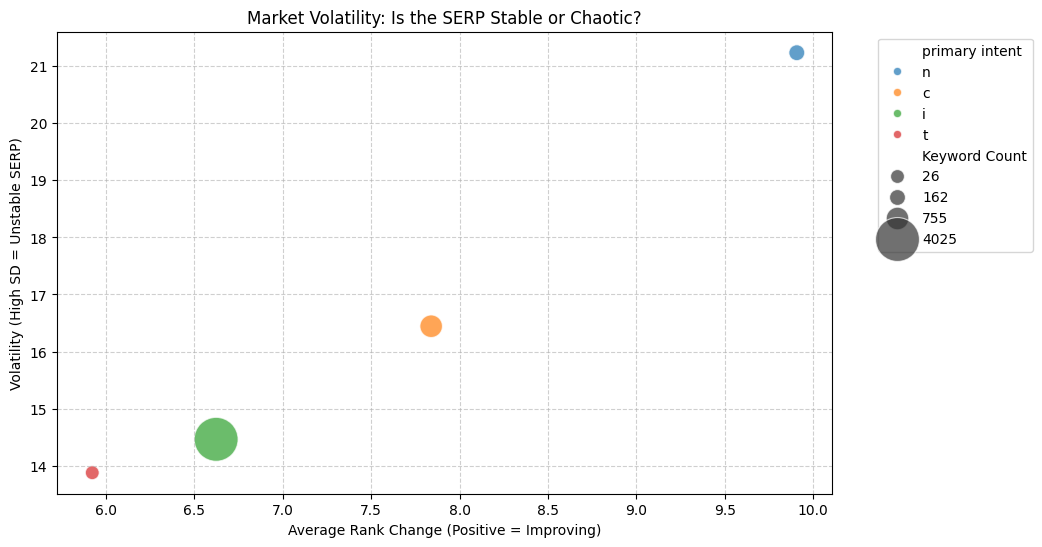

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv('keywords_data.csv')

# 1. DEFINE COLUMNS
# (Ensure names match your CSV exactly)
diff_cols = {
    'Yachting Pages': 'yatching-pages.com_cleaned_rank_difference',
    'Superyacht Times': 'superyachttimes.com_cleaned_rank_difference',
    'Superyacht Content': 'superyachtcontent.com_cleaned_rank_difference',
    'Service Guide': 'superyachtserviceguide.com_cleaned_rank_difference',
    'Boat International': 'boatinternation.com_cleaned_rank_difference'
}

# 2. THE FIX: Force all difference columns to be numeric before starting
for name, col in diff_cols.items():
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. NET GROWTH ANALYSIS (Aggregated Delta)
net_movement = {name: df[col].sum() for name, col in diff_cols.items()}
growth_df = pd.DataFrame(list(net_movement.items()), columns=['Domain', 'Net Rank Change'])
growth_df = growth_df.sort_values(by='Net Rank Change', ascending=False)

# Plotting Growth
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in growth_df['Net Rank Change']]
sns.barplot(data=growth_df, x='Net Rank Change', y='Domain', palette=colors)
plt.title('Net SEO Growth/Decay (Total Rank Positions Gained/Lost)')
plt.axvline(0, color='black', lw=1)
plt.show()

# 4. VOLATILITY ANALYSIS (Standard Deviation by Intent)
target_diff = diff_cols['Yachting Pages']

# Grouping now works because the column is guaranteed to be numeric
volatility_analysis = df.groupby('primary intent')[target_diff].agg(['std', 'mean', 'count'])
volatility_analysis.columns = ['Volatility (SD)', 'Avg Change', 'Keyword Count']

# Filter for groups with more than 5 keywords to avoid "noise"
volatility_analysis = volatility_analysis[volatility_analysis['Keyword Count'] > 5]
volatility_analysis = volatility_analysis.sort_values(by='Volatility (SD)', ascending=False)

print("--- SERP Volatility by Intent (Yachting Pages) ---")
print(volatility_analysis)

# 5. VOLATILITY VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=volatility_analysis, 
    x='Avg Change', 
    y='Volatility (SD)', 
    size='Keyword Count', 
    hue=volatility_analysis.index, 
    sizes=(100, 1000),
    alpha=0.7
)
plt.title('Market Volatility: Is the SERP Stable or Chaotic?')
plt.xlabel('Average Rank Change (Positive = Improving)')
plt.ylabel('Volatility (High SD = Unstable SERP)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
# Calculate SD of Ranks to see "Niche Authority"
# Low SD = Consistent performance across the category
consistency = df.groupby('primary intent')[rank_cols['Yachting Pages']].std().reset_index()
consistency.columns = ['Intent', 'Rank Scattering (SD)']

print("--- Ranking Consistency (Lower is more Stable/Authoritative) ---")
print(consistency.sort_values(by='Rank Scattering (SD)'))

--- Ranking Consistency (Lower is more Stable/Authoritative) ---
  Intent  Rank Scattering (SD)
1      i             53.304666
0      c             58.576558
2      n             58.684411
3      t             59.391068
